In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

from lusi.svm import SVMIRandomProjections
from lusi.invariants import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Get the data and split it in train and test
X, y = diabetes_df.drop('Outcome', axis=1).values, diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=47)

In [4]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)


Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 14.03it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:15<00:00, 13.24it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:34<00:00, 10.59it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:50<00:00,  9.02it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:42<00:00,  9.73it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:48<00:00,  9.20it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.74it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:05<00:00,  7.95it/s]


[]

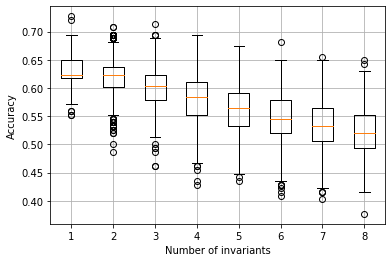

In [6]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

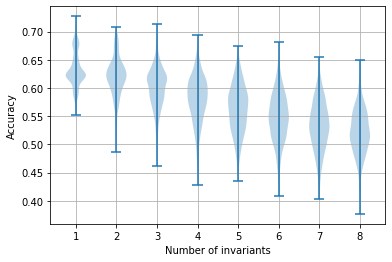

In [7]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

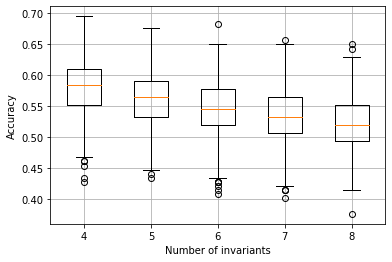

In [8]:
plt.boxplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

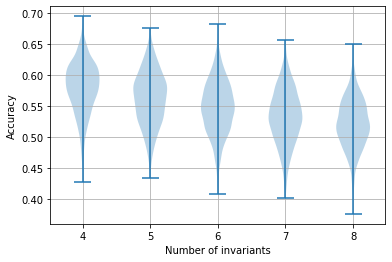

In [9]:
plt.violinplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [10]:
svm_baseline = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 0
Max. accuracy: 0.7272727272727273

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 0
Max. accuracy: 0.7077922077922078

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 0
Max. accuracy: 0.7142857142857143

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 0
Max. accuracy: 0.6948051948051948

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 0
Max. accuracy: 0.6753246753246753

Number of elements wi

In [11]:
# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.3)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:15<00:00, 13.22it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:16<00:00, 12.99it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:23<00:00, 11.91it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:34<00:00, 10.55it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:40<00:00,  9.90it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.73it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:02<00:00,  8.15it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.61it/s]


[]

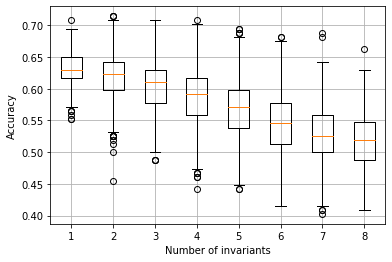

In [12]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

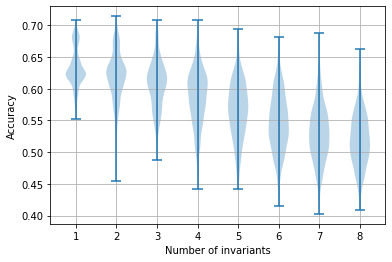

In [13]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

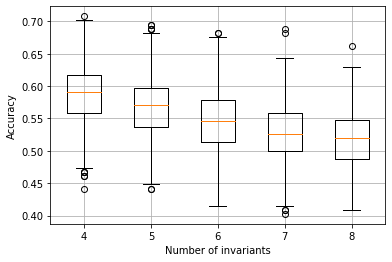

In [14]:
plt.boxplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

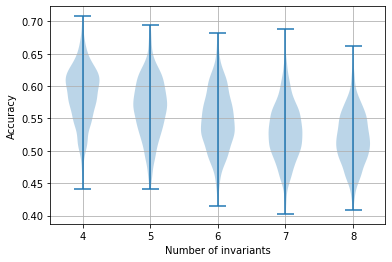

In [15]:
plt.violinplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [16]:
svm_baseline = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 0
Max. accuracy: 0.7077922077922078

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 0
Max. accuracy: 0.7142857142857143

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 0
Max. accuracy: 0.7077922077922078

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 0
Max. accuracy: 0.7077922077922078

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 0
Max. accuracy: 0.6948051948051948

Number of elements wi

# Trying different train/test partitions

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 43.12it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 34.77it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 27.89it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.50it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 20.96it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.57it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.58it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.70it/s]


[]

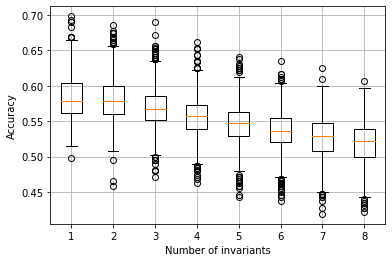

In [18]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

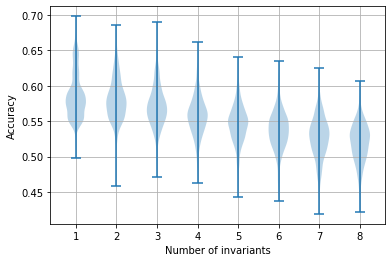

In [19]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

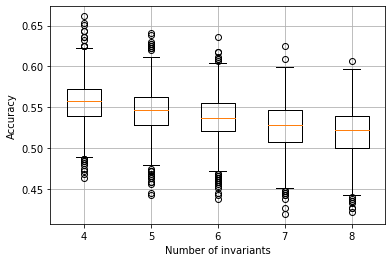

In [20]:
plt.boxplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

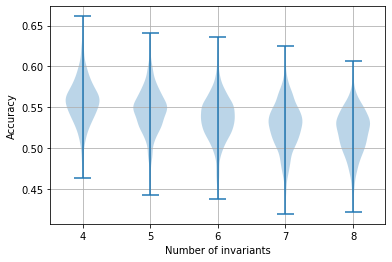

In [21]:
plt.violinplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [22]:
svm_baseline = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7421875

Number of elements with accuracy >= 0.7421875 using 1 invariants: 0
Number of elements with accuracy > 0.7421875 using 1 invariants: 0
Max. accuracy: 0.6979166666666666

Number of elements with accuracy >= 0.7421875 using 2 invariants: 0
Number of elements with accuracy > 0.7421875 using 2 invariants: 0
Max. accuracy: 0.6848958333333334

Number of elements with accuracy >= 0.7421875 using 3 invariants: 0
Number of elements with accuracy > 0.7421875 using 3 invariants: 0
Max. accuracy: 0.6901041666666666

Number of elements with accuracy >= 0.7421875 using 4 invariants: 0
Number of elements with accuracy > 0.7421875 using 4 invariants: 0
Max. accuracy: 0.6614583333333334

Number of elements with accuracy >= 0.7421875 using 5 invariants: 0
Number of elements with accuracy > 0.7421875 using 5 invariants: 0
Max. accuracy: 0.640625

Number of elements with accuracy >= 0.7421875 using 6 invariants: 0
Number of elements with accuracy > 0.7421875 using 6 invariant

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.37it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.05it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 40.94it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 33.27it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.64it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.78it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.49it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 17.86it/s]


[]

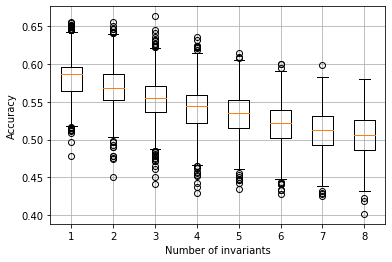

In [24]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

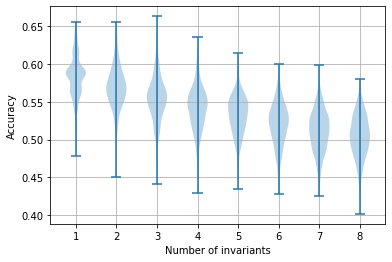

In [25]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

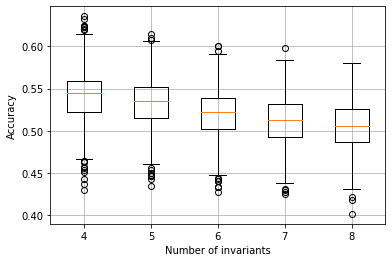

In [26]:
plt.boxplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

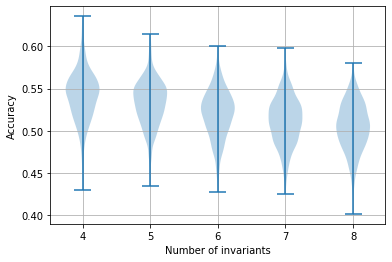

In [27]:
plt.violinplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [28]:
svm_baseline = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.741635687732342

Number of elements with accuracy >= 0.741635687732342 using 1 invariants: 0
Number of elements with accuracy > 0.741635687732342 using 1 invariants: 0
Max. accuracy: 0.6561338289962825

Number of elements with accuracy >= 0.741635687732342 using 2 invariants: 0
Number of elements with accuracy > 0.741635687732342 using 2 invariants: 0
Max. accuracy: 0.6561338289962825

Number of elements with accuracy >= 0.741635687732342 using 3 invariants: 0
Number of elements with accuracy > 0.741635687732342 using 3 invariants: 0
Max. accuracy: 0.6635687732342007

Number of elements with accuracy >= 0.741635687732342 using 4 invariants: 0
Number of elements with accuracy > 0.741635687732342 using 4 invariants: 0
Max. accuracy: 0.6356877323420075

Number of elements with accuracy >= 0.741635687732342 using 5 invariants: 0
Number of elements with accuracy > 0.741635687732342 using 5 invariants: 0
Max. accuracy: 0.6152416356877324

Number of elements with accuracy

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.98it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.18it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.71it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 42.25it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.56it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 27.96it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.80it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.56it/s]


[]

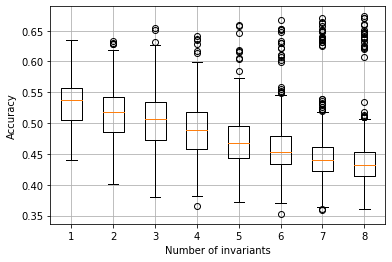

In [30]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

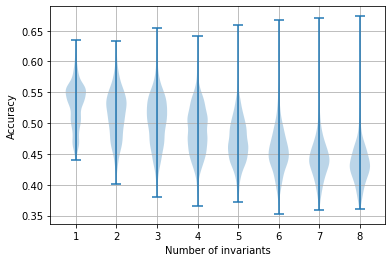

In [31]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

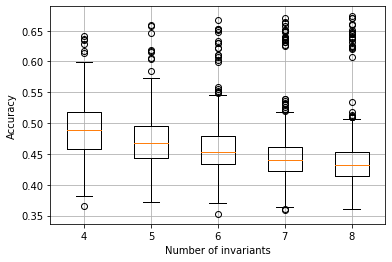

In [32]:
plt.boxplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

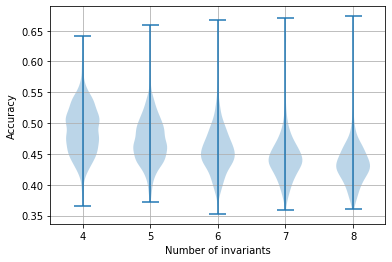

In [33]:
plt.violinplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [34]:
svm_baseline = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7456647398843931

Number of elements with accuracy >= 0.7456647398843931 using 1 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 1 invariants: 0
Max. accuracy: 0.634393063583815

Number of elements with accuracy >= 0.7456647398843931 using 2 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 2 invariants: 0
Max. accuracy: 0.6329479768786127

Number of elements with accuracy >= 0.7456647398843931 using 3 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 3 invariants: 0
Max. accuracy: 0.6546242774566474

Number of elements with accuracy >= 0.7456647398843931 using 4 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 4 invariants: 0
Max. accuracy: 0.6416184971098265

Number of elements with accuracy >= 0.7456647398843931 using 5 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 5 invariants: 0
Max. accuracy: 0.6589595375722543

Number of elements wit

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.05it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.32it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.76it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 42.48it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.22it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.28it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.43it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.36it/s]


[]

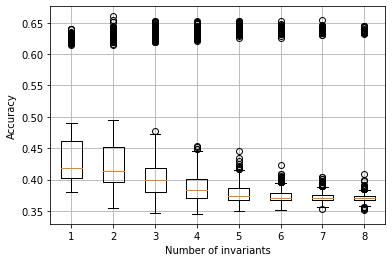

In [36]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

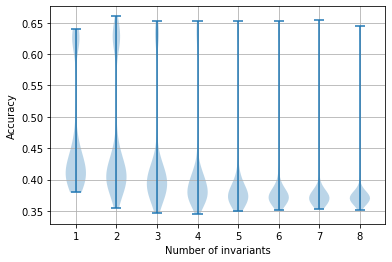

In [37]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

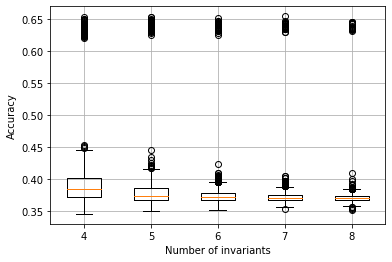

In [38]:
plt.boxplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

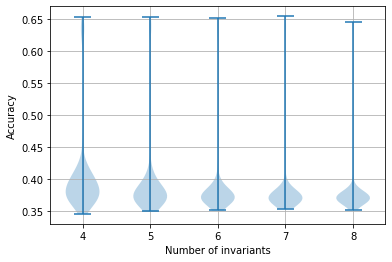

In [39]:
plt.violinplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [40]:
svm_baseline = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.684931506849315

Number of elements with accuracy >= 0.684931506849315 using 1 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 1 invariants: 0
Max. accuracy: 0.6397260273972603

Number of elements with accuracy >= 0.684931506849315 using 2 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 2 invariants: 0
Max. accuracy: 0.6602739726027397

Number of elements with accuracy >= 0.684931506849315 using 3 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 3 invariants: 0
Max. accuracy: 0.6520547945205479

Number of elements with accuracy >= 0.684931506849315 using 4 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 4 invariants: 0
Max. accuracy: 0.6534246575342466

Number of elements with accuracy >= 0.684931506849315 using 5 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 5 invariants: 0
Max. accuracy: 0.6534246575342466

Number of elements with accuracy